In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked     

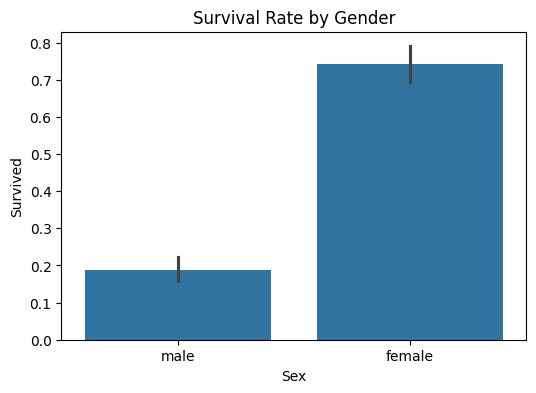

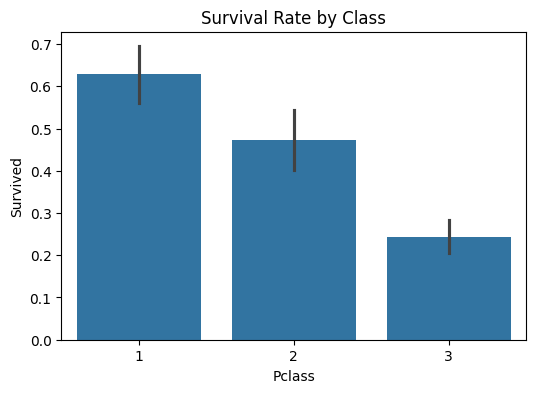

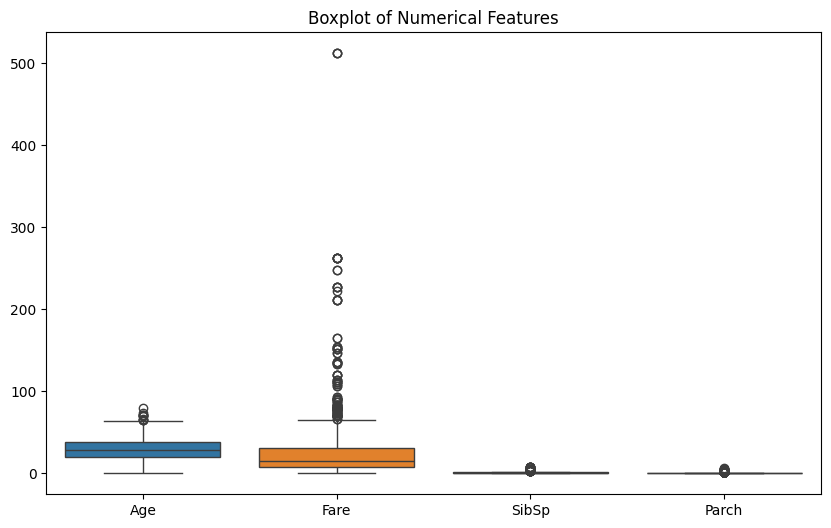

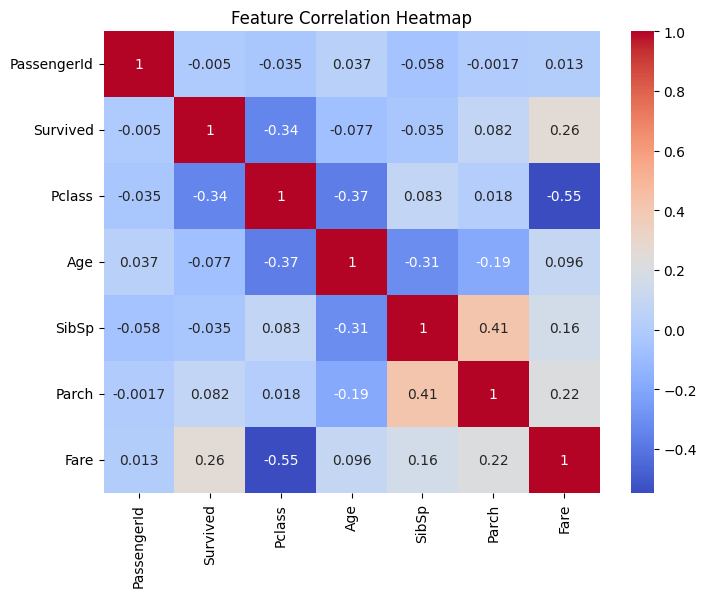

<ipython-input-3-70dcb8885826>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
<ipython-input-3-70dcb8885826>:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

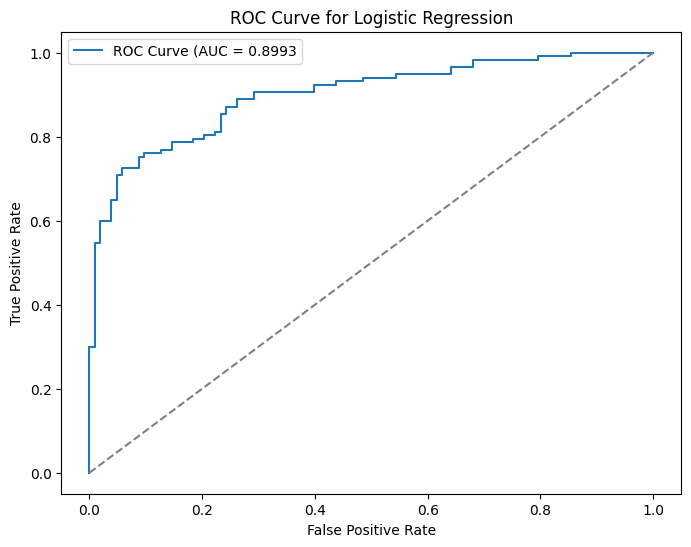

2025-03-12 18:46:11.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 18:46:11.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import pickle
import streamlit as st

# Load datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

# ================================
#  1. EXPLORATORY DATA ANALYSIS (EDA)
# ================================

# Display basic info
print(train_df.info())

# Check for missing values
print("Missing values:\n", train_df.isnull().sum())

# Extract insights from data
print("Survival rate:")
print(train_df["Survived"].value_counts(normalize=True) * 100)

# Gender-based survival analysis
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Gender")
plt.show()

# Class-based survival analysis
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival Rate by Class")
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplot of Numerical Features")
plt.show()

# Heatmap to show correlation
plt.figure(figsize=(8, 6))
numerical_features = train_df.select_dtypes(include=np.number).columns
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ================================
#  2. DATA PREPROCESSING
# ================================

# Handle missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

# Drop unnecessary columns
train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
train_df["Sex"] = encoder.fit_transform(train_df["Sex"])
train_df["Embarked"] = encoder.fit_transform(train_df["Embarked"])

# Feature Scaling
scaler = StandardScaler()
train_df[["Age", "Fare", "SibSp", "Parch"]] = scaler.fit_transform(train_df[["Age", "Fare", "SibSp", "Parch"]])

# Splitting Data
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
#  3. MODEL BUILDING & TRAINING
# ================================

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

# ================================
#  4. MODEL EVALUATION (ROC Curve)
# ================================

# Make predictions
y_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

# ================================
#  5. STREAMLIT DEPLOYMENT
# ================================

def run_streamlit():
    st.title("Titanic Survival Prediction")
    st.write("Enter passenger details to predict survival.")

    Pclass = st.selectbox("Pclass", [1, 2, 3])
    Sex = st.selectbox("Sex", ["Male", "Female"])
    Age = st.number_input("Age", min_value=0, max_value=100, value=30)
    SibSp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
    Parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
    Fare = st.number_input("Fare", min_value=0, value=50)
    Embarked = st.selectbox("Embarked", ["C", "Q", "S"])

    Sex = 1 if Sex == "Male" else 0
    Embarked = {"C": 0, "Q": 1, "S": 2}[Embarked]

    # Normalize inputs
    Age = (Age - train_df["Age"].mean()) / train_df["Age"].std()
    Fare = (Fare - train_df["Fare"].mean()) / train_df["Fare"].std()

    # Load model
    with open("logistic_regression_model.pkl", "rb") as file:
        model = pickle.load(file)

    input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])
    prediction = model.predict(input_data)[0]
    prediction_proba = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f"The passenger **SURVIVED** with probability {prediction_proba:.2f}")
    else:
        st.error(f"The passenger **DID NOT SURVIVE** with probability {1 - prediction_proba:.2f}")

if __name__ == "__main__":
    run_streamlit()

In [17]:
# Install required libraries
!pip install streamlit pyngrok

# Download and unzip Ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

# Authenticate Ngrok (Replace YOUR_NGROK_AUTH_TOKEN with your actual token)
!./ngrok authtoken 2uEH45ZS6NG2m7JBQLjlxbDviBU_2wMvWxaf6sAqde1MdmEJi
!ngrok config add-authtoken 2uEH45ZS6NG2m7JBQLjlxbDviBU_2wMvWxaf6sAqde1MdmEJi

--2025-03-12 19:14:04--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 75.2.60.68, 99.83.220.108, 13.248.244.96, ...
Connecting to bin.equinox.io (bin.equinox.io)|75.2.60.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.28M  12.8MB/s    in 1.0s    

2025-03-12 19:14:06 (12.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [18]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

# Load the trained model
with open("logistic_regression_model.pkl", "rb") as file:
    model = pickle.load(file)

# Title of the web app
st.title(" Titanic Survival Prediction App")
st.write("Enter passenger details below to predict survival.")

# User inputs for prediction
Pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
Sex = st.selectbox("Sex", ["Male", "Female"])
Age = st.number_input("Age", min_value=0, max_value=100, value=30)
SibSp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
Parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
Fare = st.number_input("Fare ($)", min_value=0, value=50)
Embarked = st.selectbox("Embarked Port", ["C", "Q", "S"])

# Convert categorical inputs to numeric values
Sex = 1 if Sex == "Male" else 0
Embarked = {"C": 0, "Q": 1, "S": 2}[Embarked]

# Normalize numerical inputs (Use mean & std values from training data)
Age_mean, Age_std = 29.7, 14.5  # Replace with actual values from training
Fare_mean, Fare_std = 32.2, 49.7  # Replace with actual values from training

Age = (Age - Age_mean) / Age_std
Fare = (Fare - Fare_mean) / Fare_std

# Prepare input data
input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])

# Make prediction
prediction = model.predict(input_data)[0]
prediction_proba = model.predict_proba(input_data)[0][1]

# Display results
if prediction == 1:
    st.success(f" The passenger **SURVIVED** with a probability of {prediction_proba:.2f}")
else:
    st.error(f" The passenger **DID NOT SURVIVE** with a probability of {1 - prediction_proba:.2f}")


Overwriting app.py


In [20]:
from pyngrok import ngrok
import os

# Run Streamlit app in the background
os.system("streamlit run app.py &")

# Open a public URL with Ngrok
# Specify the port in the 'config' field
public_url = ngrok.connect(addr="localhost:8501", bind_tls=True)
print(f" Public URL: {public_url}")

🚀 Public URL: NgrokTunnel: "https://d804-34-16-192-219.ngrok-free.app" -> "http://localhost:8501"


## Interview Questions
1. What is the difference between precision and recall?
Precision and recall are evaluation metrics used in classification problems, particularly in imbalanced datasets.

Metric	Definition	Formula	When is it Important?
Precision	Measures how many predicted positives are actually correct.
Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
​
When false positives are costly (e.g., fraud detection, spam filtering).
Recall	Measures how many actual positives were correctly predicted.
Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
​
When false negatives are costly (e.g., medical diagnosis, cancer detection).
 Example:

In a spam email classifier:
High precision ensures that when an email is classified as spam, it's actually spam.
High recall ensures that most spam emails are detected, even if a few non-spam emails are mistakenly classified as spam.
2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to evaluate a model’s performance by splitting the dataset into multiple subsets (folds). It ensures that the model is tested on different portions of the data to reduce overfitting.

Why is it important in binary classification?

Prevents Overfitting – Ensures the model generalizes well by testing on different data splits.
Provides Reliable Metrics – Produces more stable accuracy, precision, recall, and F1-score.
Utilizes Data Efficiently – Every observation is used for both training and validation.

Common Cross-Validation Methods:

K-Fold Cross-Validation (Most commonly used, k=5 or 10)
Stratified K-Fold (Maintains class balance in each fold, useful for imbalanced datasets)
Leave-One-Out Cross-Validation (LOOCV) (Each data point is a test set once, expensive for large datasets)